In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

# train.csv

In [347]:
train=pd.read_csv('train.csv',encoding='cp949')

In [348]:
train

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2018-09-09 00:00:00,19,19,8,206
1,2018-09-09 01:00:00,20,19,9,259
2,2018-09-09 02:00:00,12,9,1,48
3,2018-09-09 03:00:00,10,10,2,102
4,2018-09-09 04:00:00,6,5,3,18
...,...,...,...,...,...
19003,2020-11-08 19:00:00,124,123,19,3128
19004,2020-11-08 20:00:00,166,159,29,4864
19005,2020-11-08 21:00:00,184,173,32,3426
19006,2020-11-08 22:00:00,163,155,34,2845


In [183]:
train['DateTime']=pd.to_datetime(train['DateTime'])

In [184]:
train['년도&월']=train['DateTime'].dt.to_period('M')
year_month=train.groupby('년도&월').mean().reset_index()

In [185]:
year_month

,년도&월,사용자,세션,신규방문자,페이지뷰
0,2018-09,9.433712,8.892045,1.967803,67.316288
1,2018-10,6.213710,6.198925,2.211022,37.901882
2,2018-11,9.259722,9.419444,3.501389,71.037500
3,2018-12,9.840054,9.752688,2.657258,93.572581
4,2019-01,12.599462,12.536290,3.501344,101.442204
5,2019-02,12.556548,13.202381,5.465774,87.299107
6,2019-03,12.069892,12.286290,3.930108,89.607527
7,2019-04,11.543056,11.747222,3.587500,83.756944
8,2019-05,24.517473,25.067204,9.311828,270.104839
9,2019-06,16.065278,16.300000,5.758333,156.402778


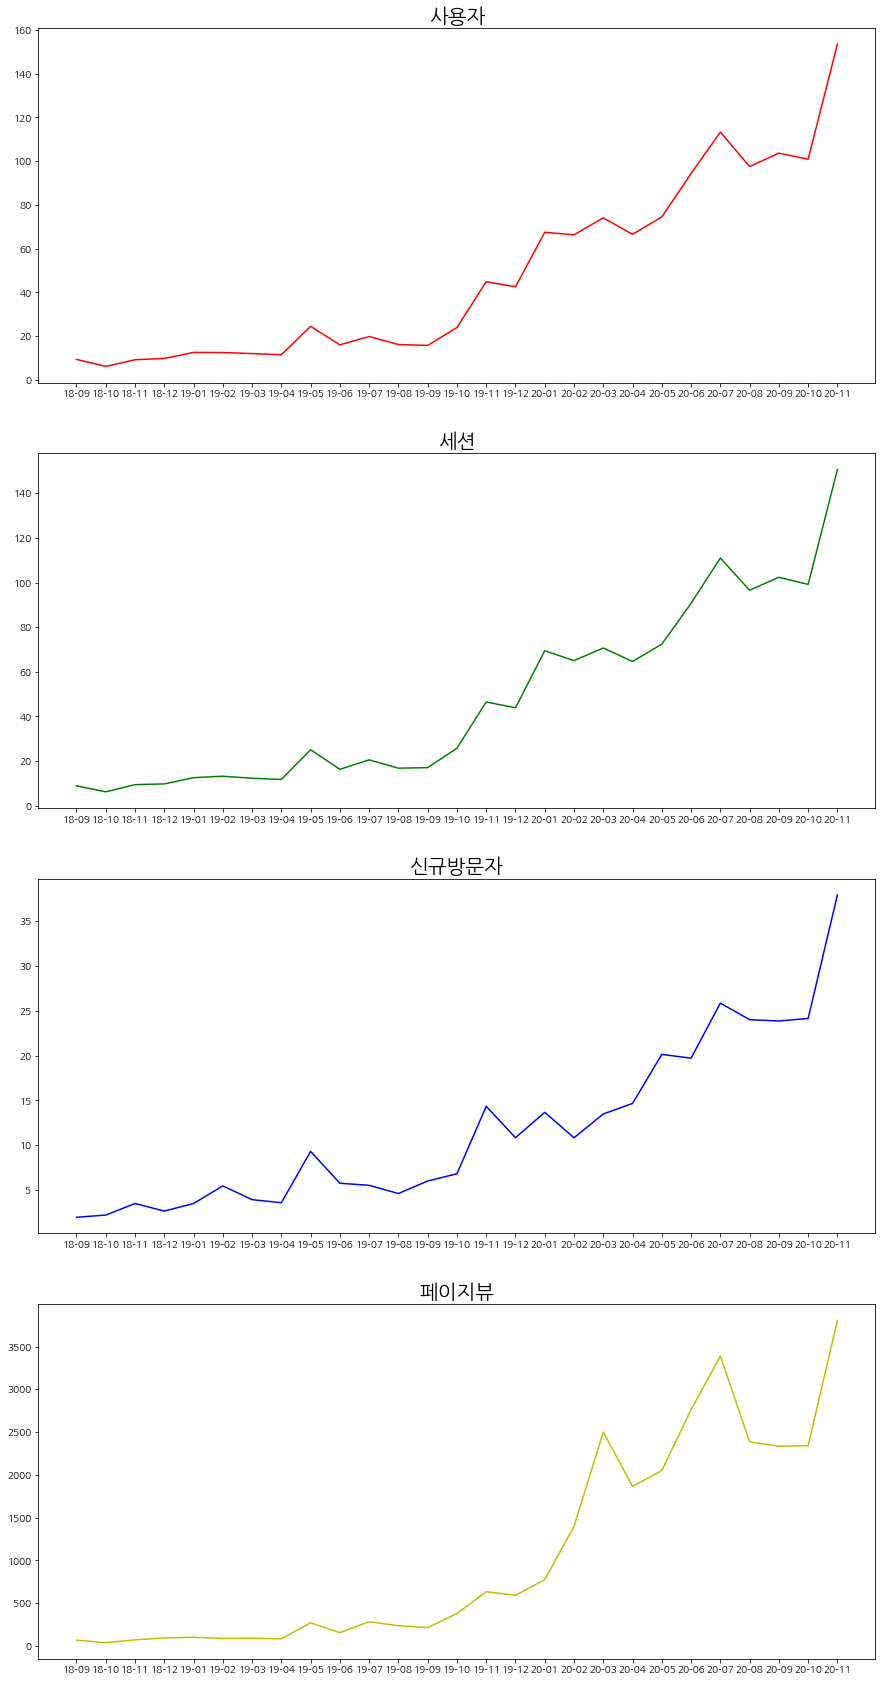

In [186]:
fig, axes = plt.subplots(4, 1, figsize=(15, 30))
axes[0].plot(year_month['년도&월'].dt.strftime('%y-%m'), year_month['사용자'], 'r')
axes[1].plot(year_month['년도&월'].dt.strftime('%y-%m'), year_month['세션'], 'g')
axes[2].plot(year_month['년도&월'].dt.strftime('%y-%m'), year_month['신규방문자'], 'b')
axes[3].plot(year_month['년도&월'].dt.strftime('%y-%m'), year_month['페이지뷰'], 'y')
for i, title in enumerate(['사용자', '세션', '신규방문자', '페이지뷰']):
    axes[i].set_title(title,size=20)
plt.show()

In [191]:
train['요일']=train['DateTime'].dt.weekday_name

In [192]:
day=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
week_day=train.groupby('요일').mean().reindex(day).reset_index()

In [193]:
week_day

,요일,사용자,세션,신규방문자,페이지뷰
0,Monday,53.110251,52.724189,13.171460,1211.181785
1,Tuesday,52.755531,52.321903,13.490413,1190.706490
2,Wednesday,50.351401,49.934366,12.553835,1117.569690
3,Thursday,49.224558,48.973083,12.162979,1058.787242
4,Friday,46.671091,46.381268,11.678466,1026.230826
5,Saturday,33.661504,33.306416,7.775811,722.422198
6,Sunday,33.768275,33.426170,7.387792,744.341374


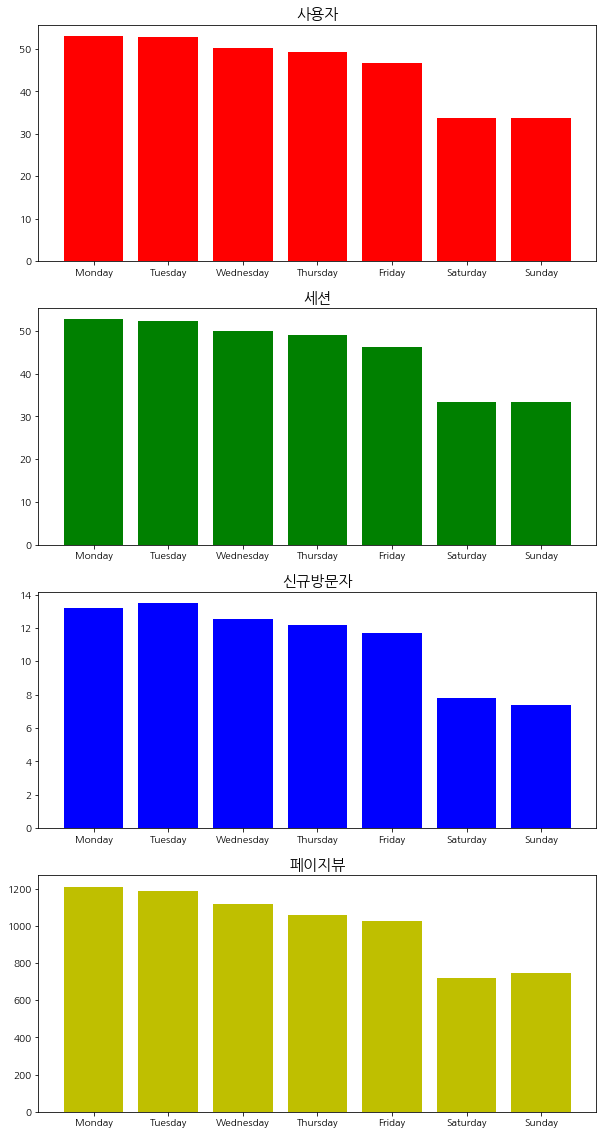

In [265]:
fig, axes = plt.subplots(4, 1, figsize=(10,20))
axes[0].bar(week_day['요일'], week_day['사용자'], color='r')
axes[1].bar(week_day['요일'], week_day['세션'], color='g')
axes[2].bar(week_day['요일'], week_day['신규방문자'], color='b')
axes[3].bar(week_day['요일'], week_day['페이지뷰'], color='y')
for i, title in enumerate(['사용자', '세션', '신규방문자', '페이지뷰']):
    axes[i].set_title(title,size=15)
plt.show()

In [195]:
train['시간']=train['DateTime'].dt.hour
hour=train.groupby('시간').mean().reset_index()

In [196]:
hour

,시간,사용자,세션,신규방문자,페이지뷰
0,0,46.270202,50.710859,10.125000,1064.257576
1,1,29.064394,27.231061,6.170455,623.564394
2,2,18.179293,17.118687,3.853535,379.474747
3,3,11.486111,10.780303,2.606061,236.808081
4,4,7.443182,7.023990,1.827020,141.917929
5,5,5.949495,5.787879,1.583333,107.553030
6,6,7.066919,7.011364,2.066919,108.974747
7,7,12.013889,12.166667,3.362374,174.809343
8,8,24.150253,24.806818,6.857323,381.575758
9,9,44.409091,45.780303,12.150253,860.137626


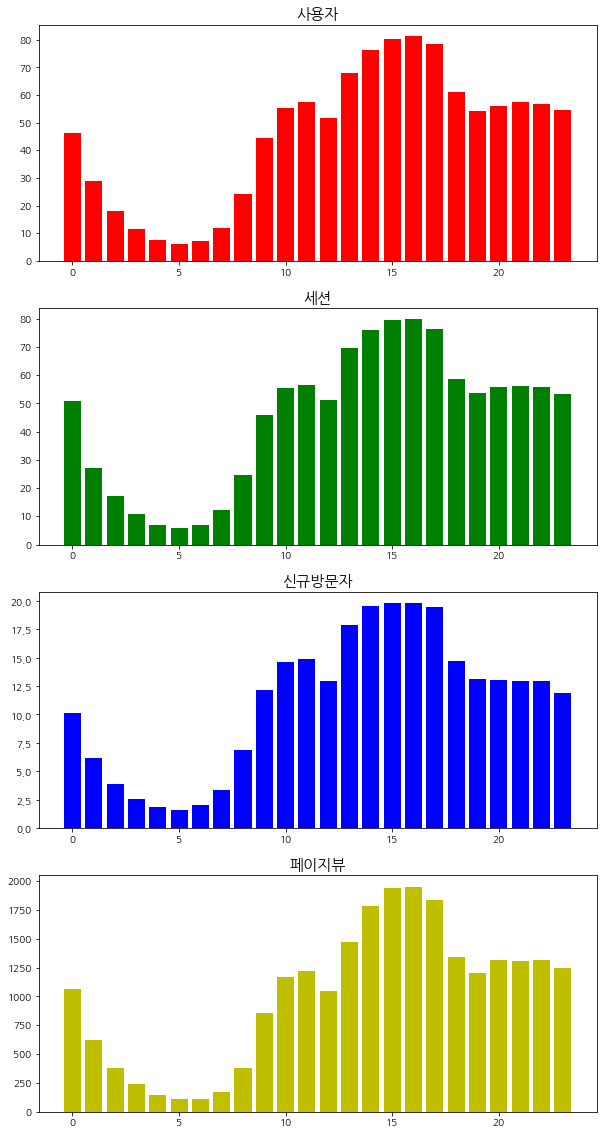

In [264]:
fig, axes = plt.subplots(4, 1, figsize=(10,20))
axes[0].bar(hour['시간'], hour['사용자'], color='r')
axes[1].bar(hour['시간'], hour['세션'], color='g')
axes[2].bar(hour['시간'], hour['신규방문자'], color='b')
axes[3].bar(hour['시간'], hour['페이지뷰'], color='y')
for i, title in enumerate(['사용자', '세션', '신규방문자', '페이지뷰']):
    axes[i].set_title(title,size=15)
plt.show()

# user.csv 

In [359]:
user=pd.read_csv('info_user.csv',encoding='cp949',index_col=0)

In [360]:
user=user.dropna()

In [361]:
user=user.reset_index(drop=True)

In [362]:
user.columns=['유저 id','아이디 생성 시점','대회 참여 횟수','코드 공유 횟수','토론 횟수','국가','파이썬 수준','데이터 사이언스 수준']

In [363]:
user

,유저 id,아이디 생성 시점,대회 참여 횟수,코드 공유 횟수,토론 횟수,국가,파이썬 수준,데이터 사이언스 수준
0,15994.0,2017-05-02 23:58,94.0,306.0,477.0,82.0,1.0,1.0
1,19195.0,2018-08-08 18:21,1.0,0.0,0.0,82.0,1.0,1.0
2,16339.0,2018-08-08 19:57,1.0,0.0,0.0,82.0,1.0,1.0
3,7290.0,2018-08-08 19:59,0.0,0.0,0.0,82.0,1.0,1.0
4,21287.0,2018-08-08 20:26,0.0,0.0,0.0,82.0,1.0,1.0
...,...,...,...,...,...,...,...,...
21687,11584.0,2020-12-08 22:53,1.0,0.0,0.0,82.0,1.0,1.0
21688,6337.0,2020-12-08 22:54,1.0,0.0,0.0,82.0,1.0,1.0
21689,2505.0,2020-12-08 23:07,1.0,0.0,0.0,82.0,1.0,1.0
21690,14182.0,2020-12-08 23:09,1.0,0.0,0.0,82.0,1.0,1.0


In [364]:
user=user.drop(0)

In [365]:
user_count=user

In [366]:
user_count['아이디 생성 시점']=pd.to_datetime(user_count['아이디 생성 시점'])
user_count['년도&월']=user_count['아이디 생성 시점'].dt.to_period('M')
user_count=user_count.groupby('년도&월').count().reset_index()

In [367]:
user_count

,년도&월,유저 id,아이디 생성 시점,대회 참여 횟수,코드 공유 횟수,토론 횟수,국가,파이썬 수준,데이터 사이언스 수준
0,2018-08,384,384,384,384,384,384,384,384
1,2018-09,187,187,187,187,187,187,187,187
2,2018-10,135,135,135,135,135,135,135,135
3,2018-11,362,362,362,362,362,362,362,362
4,2018-12,249,249,249,249,249,249,249,249
5,2019-01,276,276,276,276,276,276,276,276
6,2019-02,661,661,661,661,661,661,661,661
7,2019-03,233,233,233,233,233,233,233,233
8,2019-04,169,169,169,169,169,169,169,169
9,2019-05,395,395,395,395,395,395,395,395


In [368]:
user_0=user[(user['대회 참여 횟수']==0)&(user['코드 공유 횟수']==0)&(user['토론 횟수']==0) ]

In [369]:
user_0

,유저 id,아이디 생성 시점,대회 참여 횟수,코드 공유 횟수,토론 횟수,국가,파이썬 수준,데이터 사이언스 수준,년도&월
3,7290.0,2018-08-08 19:59:00,0.0,0.0,0.0,82.0,1.0,1.0,2018-08
4,21287.0,2018-08-08 20:26:00,0.0,0.0,0.0,82.0,1.0,1.0,2018-08
5,3828.0,2018-08-08 20:28:00,0.0,0.0,0.0,82.0,1.0,1.0,2018-08
6,404.0,2018-08-08 21:07:00,0.0,0.0,0.0,82.0,1.0,1.0,2018-08
7,1287.0,2018-08-09 09:53:00,0.0,0.0,0.0,82.0,1.0,1.0,2018-08
...,...,...,...,...,...,...,...,...,...
21663,20597.0,2020-12-08 16:10:00,0.0,0.0,0.0,82.0,1.0,1.0,2020-12
21672,4342.0,2020-12-08 19:41:00,0.0,0.0,0.0,82.0,1.0,1.0,2020-12
21673,16929.0,2020-12-08 19:41:00,0.0,0.0,0.0,82.0,1.0,1.0,2020-12
21681,15779.0,2020-12-08 22:20:00,0.0,0.0,0.0,82.0,1.0,1.0,2020-12


In [370]:
user_0['아이디 생성 시점']=pd.to_datetime(user_0['아이디 생성 시점'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [371]:
user_0['년도&월']=user_0['아이디 생성 시점'].dt.to_period('M')
user_0_year_month=user_0.groupby('년도&월').count().reset_index()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [372]:
user_0_year_month

,년도&월,유저 id,아이디 생성 시점,대회 참여 횟수,코드 공유 횟수,토론 횟수,국가,파이썬 수준,데이터 사이언스 수준
0,2018-08,296,296,296,296,296,296,296,296
1,2018-09,111,111,111,111,111,111,111,111
2,2018-10,79,79,79,79,79,79,79,79
3,2018-11,227,227,227,227,227,227,227,227
4,2018-12,142,142,142,142,142,142,142,142
5,2019-01,189,189,189,189,189,189,189,189
6,2019-02,498,498,498,498,498,498,498,498
7,2019-03,153,153,153,153,153,153,153,153
8,2019-04,100,100,100,100,100,100,100,100
9,2019-05,259,259,259,259,259,259,259,259


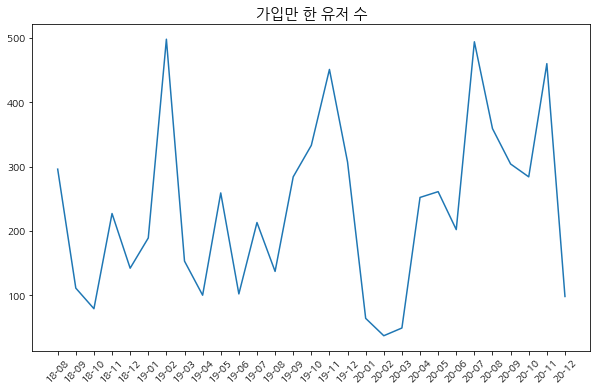

In [373]:
plt.figure(figsize=(10,6))
plt.plot(user_0_year_month['년도&월'].dt.strftime('%y-%m'),user_0_year_month['유저 id'])
plt.title('가입만 한 유저 수',size=15)
plt.xticks(rotation=45)
plt.show()

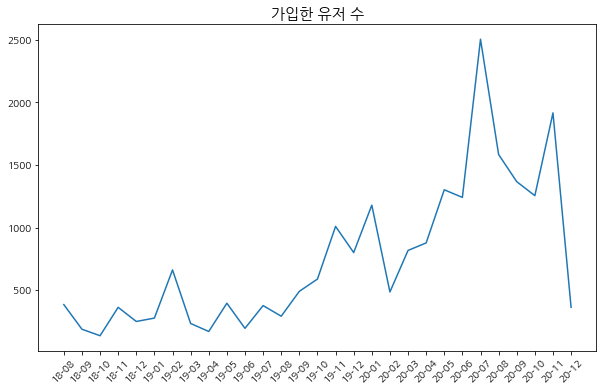

In [374]:
plt.figure(figsize=(10,6))
plt.plot(user_count['년도&월'].dt.strftime('%y-%m'),user_count['유저 id'])
plt.title('가입한 유저 수',size=15)
plt.xticks(rotation=45)
plt.show()

In [375]:
user_count=user_count.loc[:,['년도&월','유저 id']]
user_count.rename(columns={'유저 id':'가입한 유저 수'},inplace=True)
user_count['가입만 한 유저 수']=user_0_year_month['유저 id']

In [384]:
user_count=user_count.set_index('년도&월')

[]

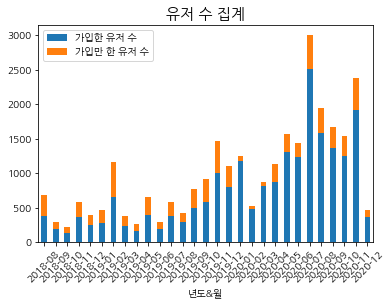

In [385]:
user_count.plot(kind='bar',stacked=True)
plt.title('유저 수 집계',size=15)
plt.xticks(rotation=45)
plt.plot()

In [312]:
user_count['비율']=user_count['가입만 한 유저 수']/user_count['가입한 유저 수']*100

In [313]:
user_count

,년도&월,가입한 유저 수,가입만 한 유저 수,비율
0,2018-08,384,296,77.083333
1,2018-09,187,111,59.358289
2,2018-10,135,79,58.518519
3,2018-11,362,227,62.707182
4,2018-12,249,142,57.028112
5,2019-01,276,189,68.478261
6,2019-02,661,498,75.340393
7,2019-03,233,153,65.665236
8,2019-04,169,100,59.171598
9,2019-05,395,259,65.569620


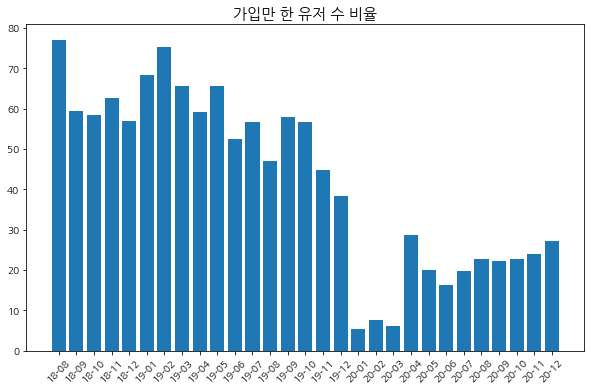

In [358]:
plt.figure(figsize=(10,6))
plt.bar(user_count['년도&월'].dt.strftime('%y-%m'),user_count['비율'])
plt.title('가입만 한 유저 수 비율',size=15)
plt.xticks(rotation=45)
plt.show()

In [326]:
user['국가'].value_counts()

82.0     21481
1.0        104
44.0        38
7.0         11
49.0         7
65.0         5
61.0         4
91.0         4
81.0         4
976.0        3
48.0         3
34.0         3
852.0        3
998.0        3
32.0         2
41.0         2
31.0         2
971.0        1
90.0         1
62.0         1
39.0         1
593.0        1
45.0         1
33.0         1
370.0        1
886.0        1
51.0         1
95.0         1
54.0         1
Name: 국가, dtype: int64

In [332]:
user['파이썬 수준'].value_counts()

1.0    21541
0.0      133
2.0       17
Name: 파이썬 수준, dtype: int64

In [331]:
user['데이터 사이언스 수준'].value_counts()

1.0    21525
0.0      154
2.0       12
Name: 데이터 사이언스 수준, dtype: int64

In [333]:
user['대회 참여 횟수'].value_counts()

1.0     8115
0.0     6751
2.0     2688
3.0     1374
4.0      820
5.0      612
6.0      333
7.0      243
8.0      161
9.0      128
10.0      98
11.0      77
12.0      62
13.0      41
14.0      26
16.0      26
15.0      23
18.0      17
17.0      16
20.0      14
19.0      13
21.0       7
22.0       6
25.0       4
31.0       4
23.0       3
27.0       3
28.0       3
30.0       3
35.0       3
24.0       2
29.0       2
43.0       2
42.0       1
37.0       1
44.0       1
45.0       1
66.0       1
56.0       1
58.0       1
73.0       1
47.0       1
52.0       1
54.0       1
Name: 대회 참여 횟수, dtype: int64

In [336]:
user_=user[(user['대회 참여 횟수']>0)&(user['코드 공유 횟수']>0)&(user['토론 횟수']>0)]

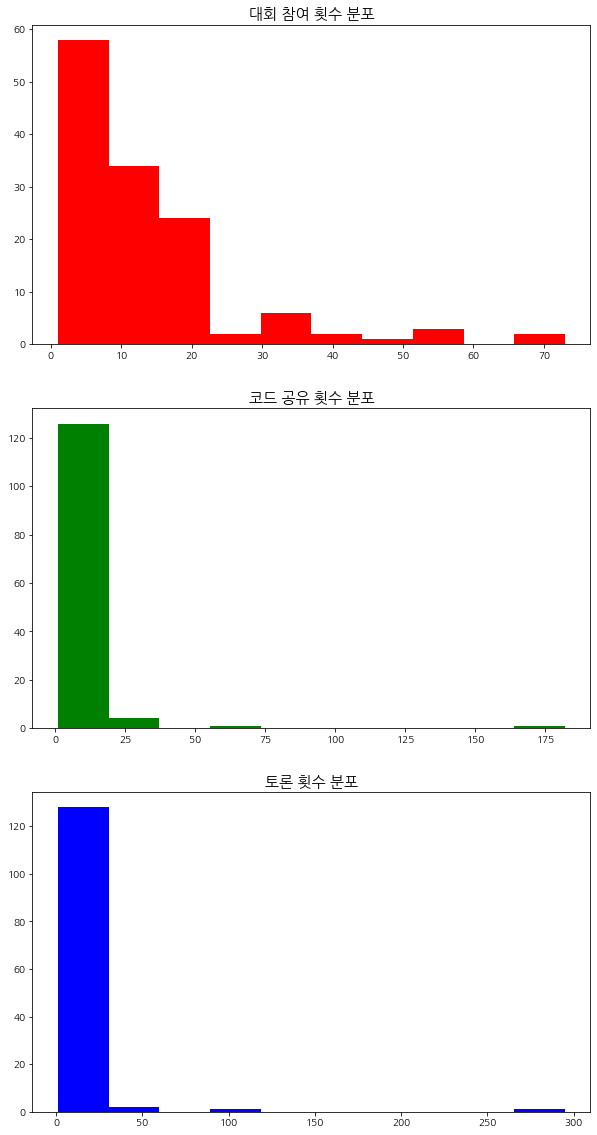

In [344]:
fig, axes = plt.subplots(3, 1, figsize=(10,20))
axes[0].hist(user_['대회 참여 횟수'], color='r')
axes[1].hist(user_['코드 공유 횟수'], color='g')
axes[2].hist(user_['토론 횟수'], color='b')
for i, title in enumerate(['대회 참여 횟수 분포', '코드 공유 횟수 분포', '토론 횟수 분포']):
    axes[i].set_title(title,size=15)
plt.show()

# competiton.csv

In [349]:
competition=pd.read_csv('info_competition.csv',encoding='cp949',index_col=0)

In [350]:
competition=competition.drop(['is_official','name_eng','keyword_eng'],axis='columns')

In [351]:
competition.columns=['대회 id','대회 시작 시점','대회 종료 시점','대회 이름','키워드','참여자 수','최대 팀 멤버','하루 최대 제출 횟수','상금','상금 정보','팀 병합 데드라인','보여지는 위너 수']

In [386]:
competition.head()

,대회 id,대회 시작 시점,대회 종료 시점,대회 이름,키워드,참여자 수,최대 팀 멤버,하루 최대 제출 횟수,상금,상금 정보,팀 병합 데드라인,보여지는 위너 수
0,136,2018-08-14 0:00,2018-09-13 23:59,대출 상점 총 매출 예측 경진대회,"금융 | 소상공인 신용카드 가맹점 빅데이터와 AI로 매출 예측 | 시계열, 회귀 ...",303,5,5,850,"$8,500 + 100,000ZPR",2018-09-13 23:59,3
1,9565,2018-09-15 0:00,2018-10-13 23:59,병원 개/폐업 분류 예측 경진대회,금융 | 병원 재무 데이터와 AI로 개업|폐업 예측 분석 | 분류 | Accuracy,448,10,3,350,"$3,500 + 40,000ZPR",2018-10-13 23:59,3
2,17801,2018-10-18 0:00,2018-12-31 23:59,아파트 경매가격 예측 경진대회,금융 | 부동산 아파트 경매 빅데이터와 AI로 경매가 예측 분석 | 회귀 | RMSE,316,10,3,1000,"$10,000 + 120,000ZPR",2018-12-31 23:59,3
3,21265,2018-11-13 0:00,2019-01-31 23:59,아파트 실거래가 예측,금융 | 부동산 빅데이터와 AI를 이용하여 실거래가를 예측 분석 | 회귀 | RMSE,568,10,3,800,"$8,000 + 80,000ZPR",2019-01-31 23:59,3
4,42473,2018-12-25 0:00,2019-01-10 23:59,신용카드 거래 데이터 시각화,"금융 | 신용카드, 시계열, 시각화 | Python, R, Tableau, Spot...",252,5,3,100,"$1,000 + 100,000ZPR",2019-01-10 23:59,3


In [396]:
top10=competition.sort_values(by=['참여자 수'],axis=0,ascending=False)

In [400]:
top10=top10.head(10)

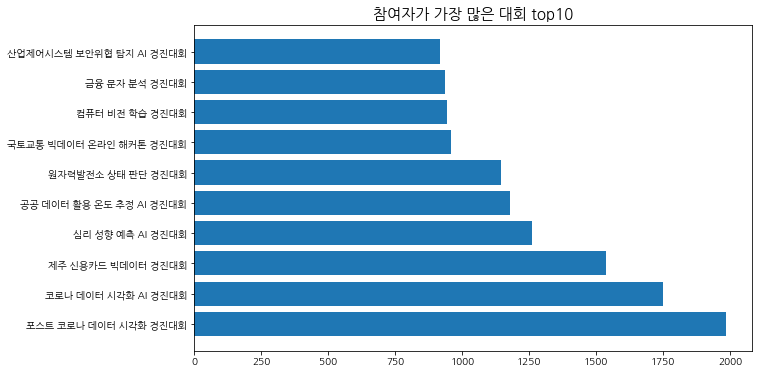

In [401]:
plt.figure(figsize=(10,6))
plt.barh(top10['대회 이름'],top10['참여자 수'])
plt.title('참여자가 가장 많은 대회 top10',size=15)
plt.show()

In [404]:
top10_money=competition.sort_values(by=['상금'],axis=0,ascending=False)
top10_money=top10_money.head(10)

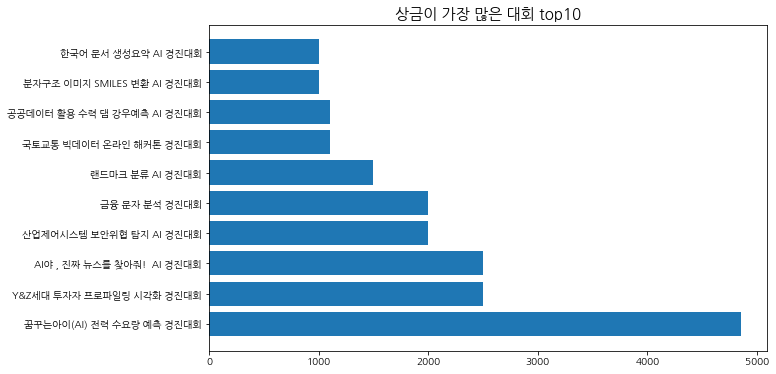

In [405]:
plt.figure(figsize=(10,6))
plt.barh(top10_money['대회 이름'],top10_money['상금'])
plt.title('상금이 가장 많은 대회 top10',size=15)
plt.show()

# sumission.csv

In [75]:
submission=pd.read_csv('info_submission.csv',encoding='cp949',index_col=0)

In [78]:
submission=submission.reset_index(drop=True)

In [95]:
submission=submission.dropna()

In [96]:
submission.columns=['제출 아이디','제출 대회 아이디','팀 아이디','유저 아이디','제출 시점']

In [98]:
submission

,제출 아이디,제출 대회 아이디,팀 아이디,유저 아이디,제출 시점
0,-250918.0,229255.0,5019.0,15880.0,2019-11-24 20:40
1,-250904.0,229611.0,5162.0,19772.0,2019-11-24 20:36
2,-250881.0,235401.0,5042.0,17801.0,2019-11-24 20:24
3,-250873.0,235401.0,5024.0,439.0,2019-11-24 20:23
4,-250860.0,229255.0,4890.0,13722.0,2019-11-24 20:19
...,...,...,...,...,...
101582,483653.0,235658.0,44883.0,11628.0,2020-12-08 23:53
101583,483654.0,235671.0,45009.0,10592.0,2020-12-08 23:56
101584,483655.0,235671.0,45013.0,5987.0,2020-12-08 23:56
101585,483656.0,235658.0,42355.0,6586.0,2020-12-08 23:57


# login.csv

In [406]:
login=pd.read_csv('info_login.csv',encoding='cp949',index_col=0)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [407]:
login=login.reset_index(drop=True)

In [408]:
login=login.dropna()

In [409]:
login

,login_id,user_id,c_time,platform,browser
0,14196.0,19195.0,2018-09-23 1:30,Windows 8,Internet Explorer 10.0
1,14234.0,22045.0,2018-09-23 2:46,Windows,Chrome 67.0.3396.99
2,14256.0,8790.0,2018-09-23 3:35,Windows,Chrome 69.0.3497.100
5,14280.0,10206.0,2018-09-23 13:24,Windows,Chrome 68.0.3440.106
6,14288.0,488.0,2018-09-23 14:05,Windows 7,Chrome 68.0.3440.106
...,...,...,...,...,...
64649,328208.0,16088.0,2019-12-30 23:19,Windows,Firefox 71.0
64650,328209.0,14107.0,2019-12-30 23:21,Windows,Chrome 79.0.3945.88
64651,328210.0,1283.0,2019-12-30 23:21,Windows,Chrome 79.0.3945.88
64652,328218.0,4077.0,2019-12-30 23:24,Windows,Chrome 79.0.3945.88


In [411]:
login.columns=['로그인 id','유저 id','로그인 시점','로그인한 플랫폼','로그인한 브라우저']

In [412]:
login

,로그인 id,유저 id,로그인 시점,로그인한 플랫폼,로그인한 브라우저
0,14196.0,19195.0,2018-09-23 1:30,Windows 8,Internet Explorer 10.0
1,14234.0,22045.0,2018-09-23 2:46,Windows,Chrome 67.0.3396.99
2,14256.0,8790.0,2018-09-23 3:35,Windows,Chrome 69.0.3497.100
5,14280.0,10206.0,2018-09-23 13:24,Windows,Chrome 68.0.3440.106
6,14288.0,488.0,2018-09-23 14:05,Windows 7,Chrome 68.0.3440.106
...,...,...,...,...,...
64649,328208.0,16088.0,2019-12-30 23:19,Windows,Firefox 71.0
64650,328209.0,14107.0,2019-12-30 23:21,Windows,Chrome 79.0.3945.88
64651,328210.0,1283.0,2019-12-30 23:21,Windows,Chrome 79.0.3945.88
64652,328218.0,4077.0,2019-12-30 23:24,Windows,Chrome 79.0.3945.88


In [413]:
login_platform=login.groupby('로그인한 플랫폼').count().reset_index()

In [421]:
login_platform=login_platform.drop(9)

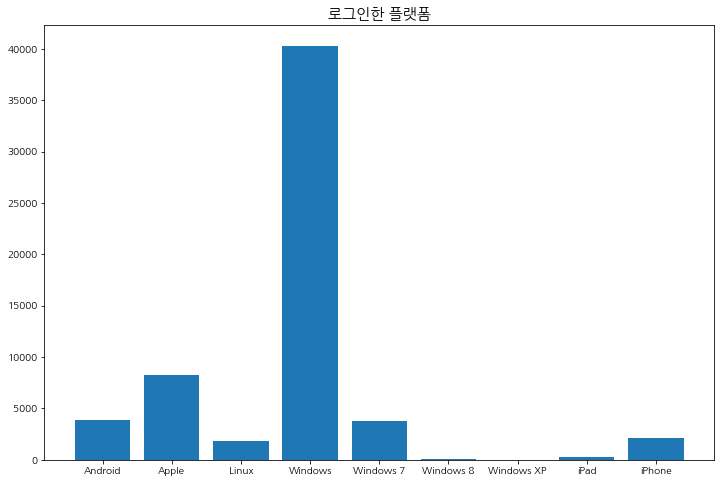

In [422]:
plt.figure(figsize=(12,8))
plt.bar(login_platform['로그인한 플랫폼'],login_platform['유저 id'])
plt.title('로그인한 플랫폼',size=15)
plt.show()

In [433]:
login['로그인한 브라우저']=login['로그인한 브라우저'].str.split(' ').str[0]

In [434]:
login.head()

,로그인 id,유저 id,로그인 시점,로그인한 플랫폼,로그인한 브라우저
0,14196.0,19195.0,2018-09-23 1:30,Windows 8,Internet
1,14234.0,22045.0,2018-09-23 2:46,Windows,Chrome
2,14256.0,8790.0,2018-09-23 3:35,Windows,Chrome
5,14280.0,10206.0,2018-09-23 13:24,Windows,Chrome
6,14288.0,488.0,2018-09-23 14:05,Windows 7,Chrome


In [435]:
login_browser=login.groupby('로그인한 브라우저').count().reset_index()

In [436]:
login_browser

,로그인한 브라우저,로그인 id,유저 id,로그인 시점,로그인한 플랫폼
0,Chrome,52535,52535,52535,52535
1,Firefox,1599,1599,1599,1599
2,Internet,1943,1943,1943,1943
3,Mozilla,8,8,8,8
4,Opera,128,128,128,128
5,Safari,2204,2204,2204,2204
6,iPad,163,163,163,163
7,iPhone,1817,1817,1817,1817


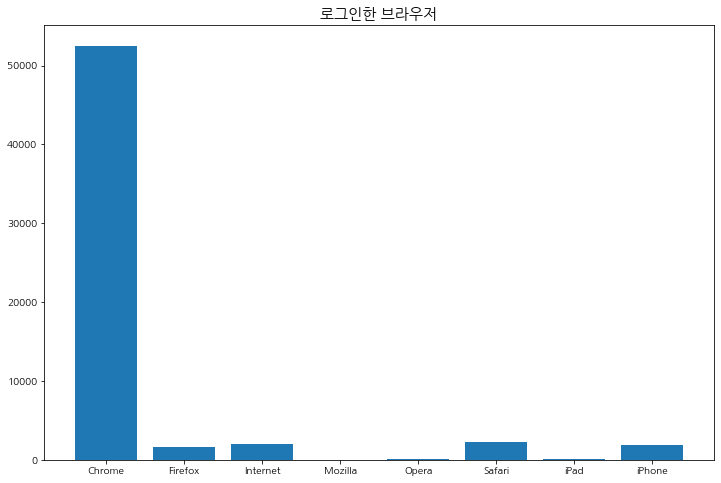

In [437]:
plt.figure(figsize=(12,8))
plt.bar(login_browser['로그인한 브라우저'],login_browser['유저 id'])
plt.title('로그인한 브라우저',size=15)
plt.show()